In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [2]:
import sys
import os


sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'scripts')))

In [3]:
from user_engagement_analysis import aggregate_metrics,top_10_customers_per_metric,normalize_metrics,perform_kmeans_clustering,compute_cluster_stats,aggregate_traffic_per_application,elbow_method

In [7]:
# Load the dataset
df = pd.read_csv('../data/telecom.csv')
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [8]:
agg_data = aggregate_metrics(df)

In [9]:
# Step 3: Top 10 customers per metric
top_customers = top_10_customers_per_metric(agg_data)
print("Top 10 customers per metric:", top_customers)

Top 10 customers per metric: {'Session Frequency':              MSISDN  Session Frequency
13526  3.362632e+10                 18
6437   3.361489e+10                 17
13180  3.362578e+10                 17
37052  3.365973e+10                 16
76363  3.367588e+10                 15
92923  3.376054e+10                 15
65118  3.366716e+10                 13
666    3.360313e+10                 12
1279   3.360452e+10                 12
13994  3.362708e+10                 12, 'Total Duration (ms)':              MSISDN  Total Duration (ms)
13180  3.362578e+10           18553754.0
6437   3.361489e+10            9966898.0
92923  3.376054e+10            9279434.0
13526  3.362632e+10            8791927.0
65118  3.366716e+10            8744914.0
50281  3.366284e+10            6614270.0
57160  3.366469e+10            6288730.0
666    3.360313e+10            6287761.0
66029  3.366746e+10            5649882.0
92577  3.376041e+10            5321667.0, 'Total Traffic (Bytes)':               MSISD

/tmp/ipykernel_46478/644044491.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='MSISDN', data=top_customers[metric], palette="viridis")


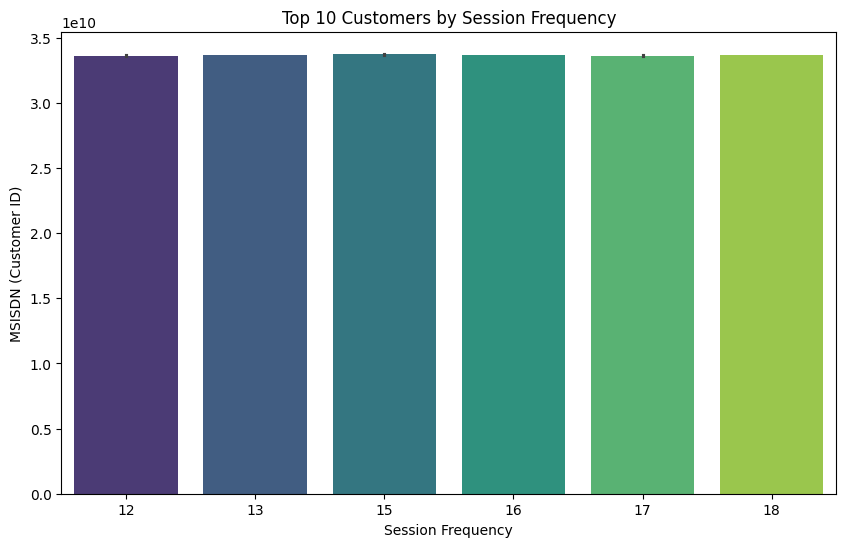

/tmp/ipykernel_46478/644044491.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='MSISDN', data=top_customers[metric], palette="viridis")


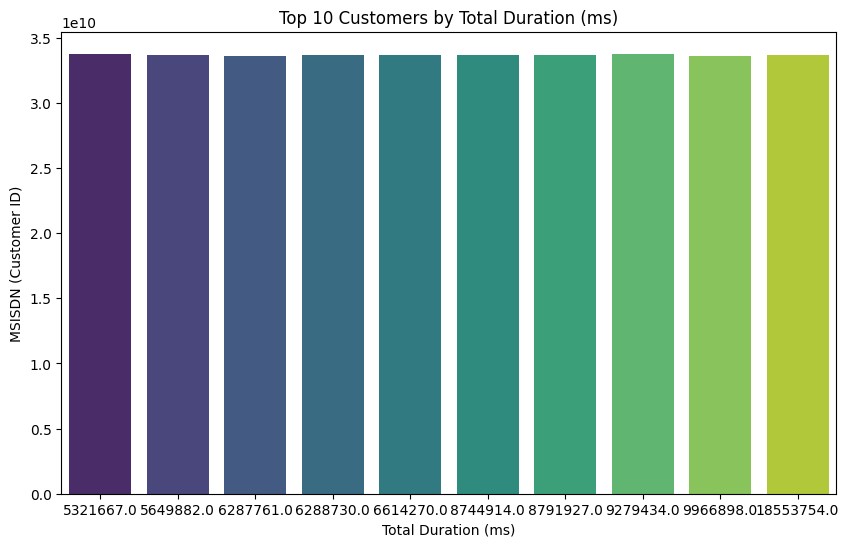

/tmp/ipykernel_46478/644044491.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='MSISDN', data=top_customers[metric], palette="viridis")


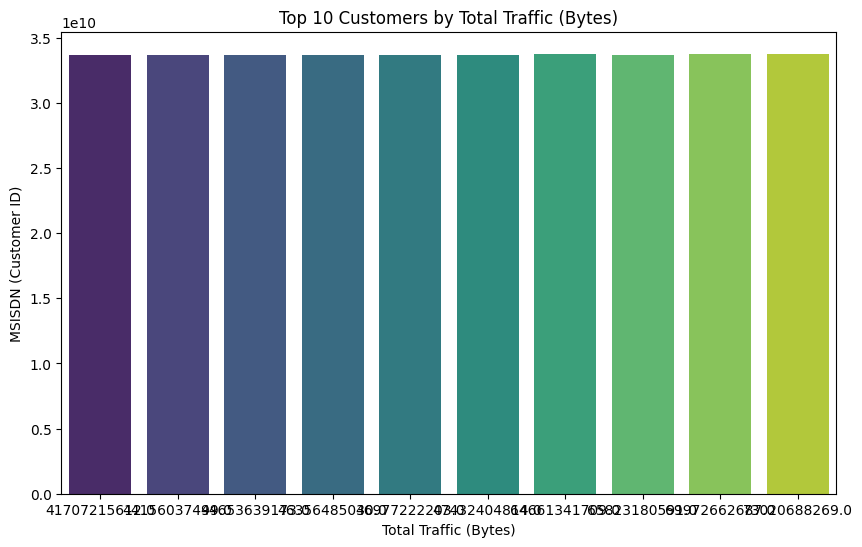

In [10]:
# Plot top 10 customers by engagement metrics
def plot_top_customers(top_customers):
    """ Plot bar charts for top 10 customers for each metric """
    metrics = ['Session Frequency', 'Total Duration (ms)', 'Total Traffic (Bytes)']
    
    for metric in metrics:
        plt.figure(figsize=(10, 6))
        sns.barplot(x=metric, y='MSISDN', data=top_customers[metric], palette="viridis")
        plt.title(f"Top 10 Customers by {metric}")
        plt.xlabel(metric)
        plt.ylabel('MSISDN (Customer ID)')
        plt.show()

# Plot the top 10 customers
plot_top_customers(top_customers)

In [11]:
# Normalize metrics
agg_data_normalized = normalize_metrics(agg_data)

In [12]:
agg_data_clustered, kmeans = perform_kmeans_clustering(agg_data_normalized, k=3)

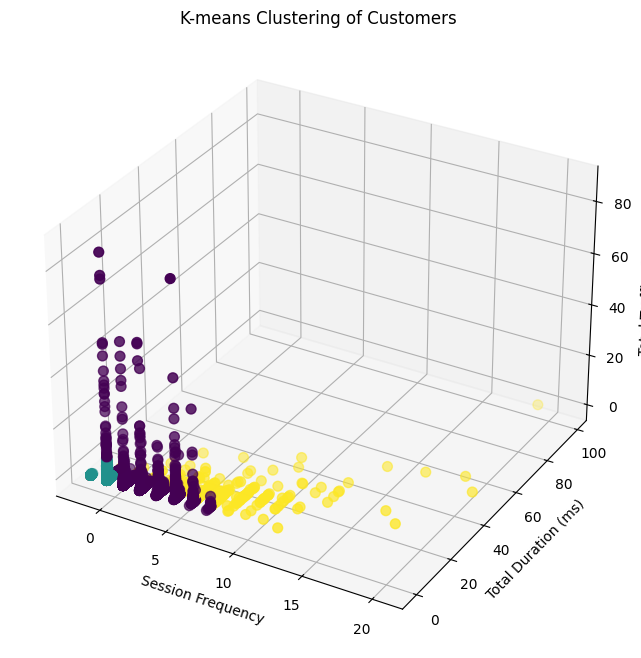

In [13]:
def plot_kmeans_clusters(agg_data_clustered):
    """ 3D scatter plot to visualize K-means clusters """
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Scatter plot of customers in different clusters
    ax.scatter(
        agg_data_clustered['Session Frequency'], 
        agg_data_clustered['Total Duration (ms)'], 
        agg_data_clustered['Total Traffic (Bytes)'], 
        c=agg_data_clustered['Cluster'], cmap='viridis', s=50
    )
    
    ax.set_xlabel('Session Frequency')
    ax.set_ylabel('Total Duration (ms)')
    ax.set_zlabel('Total Traffic (Bytes)')
    plt.title('K-means Clustering of Customers')
    plt.show()

# Plot the K-means clusters in 3D
plot_kmeans_clusters(agg_data_clustered)

In [15]:
cluster_stats = compute_cluster_stats(agg_data_clustered)
print("Cluster statistics:", cluster_stats)

Cluster statistics:         Session Frequency                                     \
                      min        max      mean           sum   
Cluster                                                        
0               -0.481290   6.927408  1.213841  34954.972965   
1               -1.716073  -0.481290 -0.487422 -37789.797799   
2               -0.481290  20.510022  5.358837   2834.824834   

        Total Duration (ms)                                     \
                        min        max      mean           sum   
Cluster                                                          
0                 -0.686487   6.306910  0.481714  13871.913393   
1                 -0.746012   2.132483 -0.237484 -18412.114522   
2                  2.422398  98.775512  8.582611   4540.201129   

        Total Traffic (Bytes)                                    
                          min        max      mean          sum  
Cluster                                                          


In [14]:
app_traffic = aggregate_traffic_per_application(df)
print("Top 10 applications by traffic:", app_traffic)

Top 10 applications by traffic:                     Handset Type  HTTP DL (Bytes)  HTTP UL (Bytes)  \
316             Huawei B528S-23A     6.396486e+12     1.659397e+11   
337                 Huawei E5180     4.365695e+11     1.399856e+10   
341                 Huawei E5573     8.731459e+10     2.038814e+09   
75        Apple iPhone X (A1901)     7.137381e+10     1.875808e+09   
49        Apple iPhone 6 (A1586)     5.124696e+10     1.547359e+09   
59        Apple iPhone 7 (A1778)     5.069151e+10     1.261788e+09   
53       Apple iPhone 6S (A1688)     4.892593e+10     1.485802e+09   
314             Huawei B525S-23A     4.147039e+10     8.997162e+08   
69   Apple iPhone 8 Plus (A1897)     3.986678e+10     8.214790e+08   
342                Huawei E5573B     3.822558e+10     8.962114e+08   

     Total Traffic (Bytes)  
316           6.562425e+12  
337           4.505680e+11  
341           8.935340e+10  
75            7.324962e+10  
49            5.279432e+10  
59            5.195330e

/tmp/ipykernel_46478/3355056688.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Handset Type', y='Total Traffic (Bytes)', data=top_3_apps, palette='viridis')


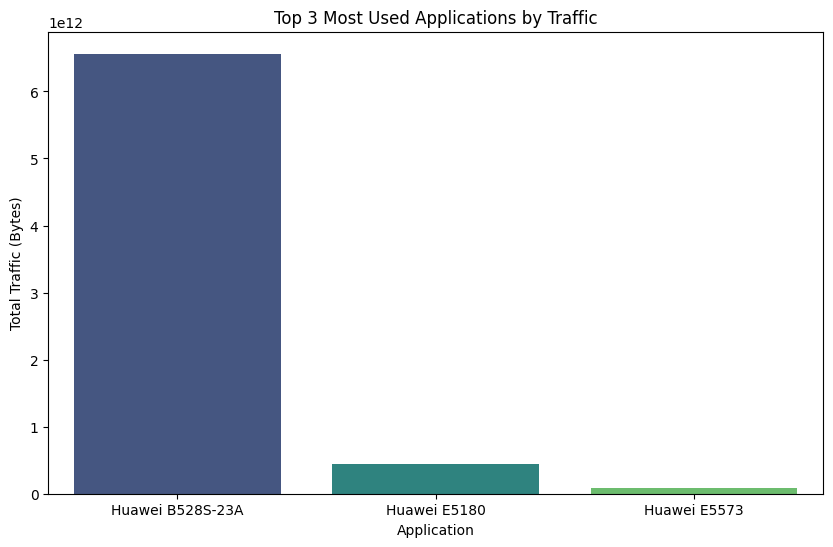

In [16]:
def plot_top_3_apps(app_traffic):
    """ Plot the top 3 most used applications by traffic """
    top_3_apps = app_traffic.nlargest(3, 'Total Traffic (Bytes)')
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Handset Type', y='Total Traffic (Bytes)', data=top_3_apps, palette='viridis')
    plt.title('Top 3 Most Used Applications by Traffic')
    plt.xlabel('Application')
    plt.ylabel('Total Traffic (Bytes)')
    plt.show()

# Plot the top 3 most used applications
plot_top_3_apps(app_traffic)

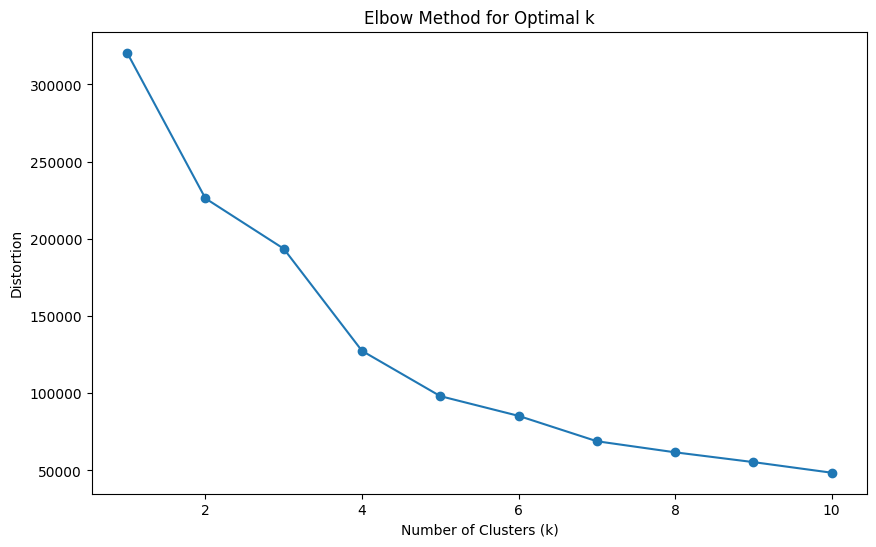

In [12]:
elbow_method(agg_data_normalized)